In [3]:
import pandas as pd
pip install numpy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

SyntaxError: invalid syntax (3491477437.py, line 2)

In [2]:
df = pd.read_excel("premiums_rest.xlsx")
df.head(3)

NameError: name 'pd' is not defined

In [91]:
df.shape

(29904, 13)

In [92]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [93]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [94]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [96]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [97]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [98]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-1, -3], dtype=int64)

In [99]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.385933,23.364184,20892.303821
std,13.412657,1.421137,24.740339,6936.813440
min,26.000000,0.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [100]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns 

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

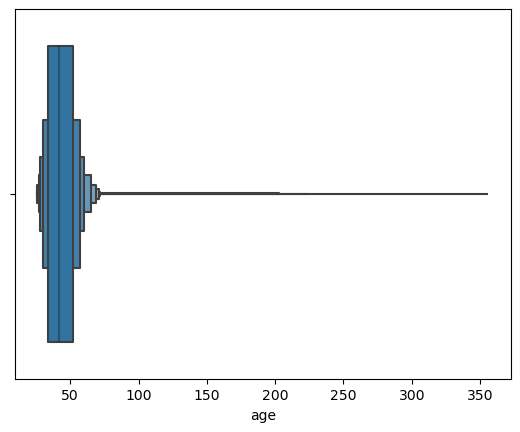

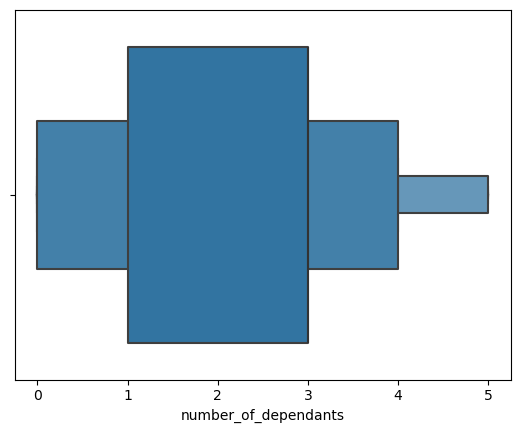

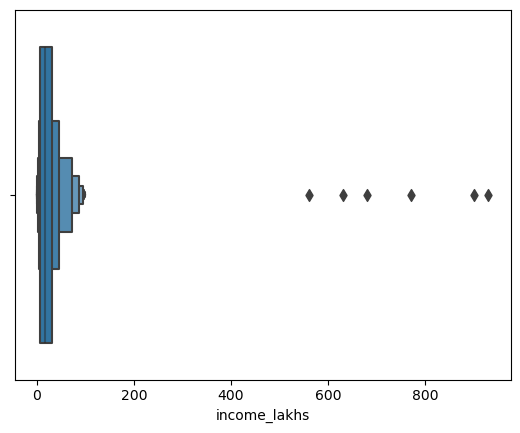

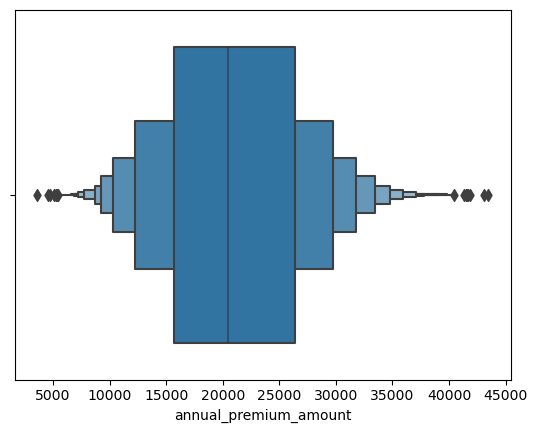

In [101]:
for col in numeric_columns:
    sns.boxenplot(x=df[col])
    plt.show()

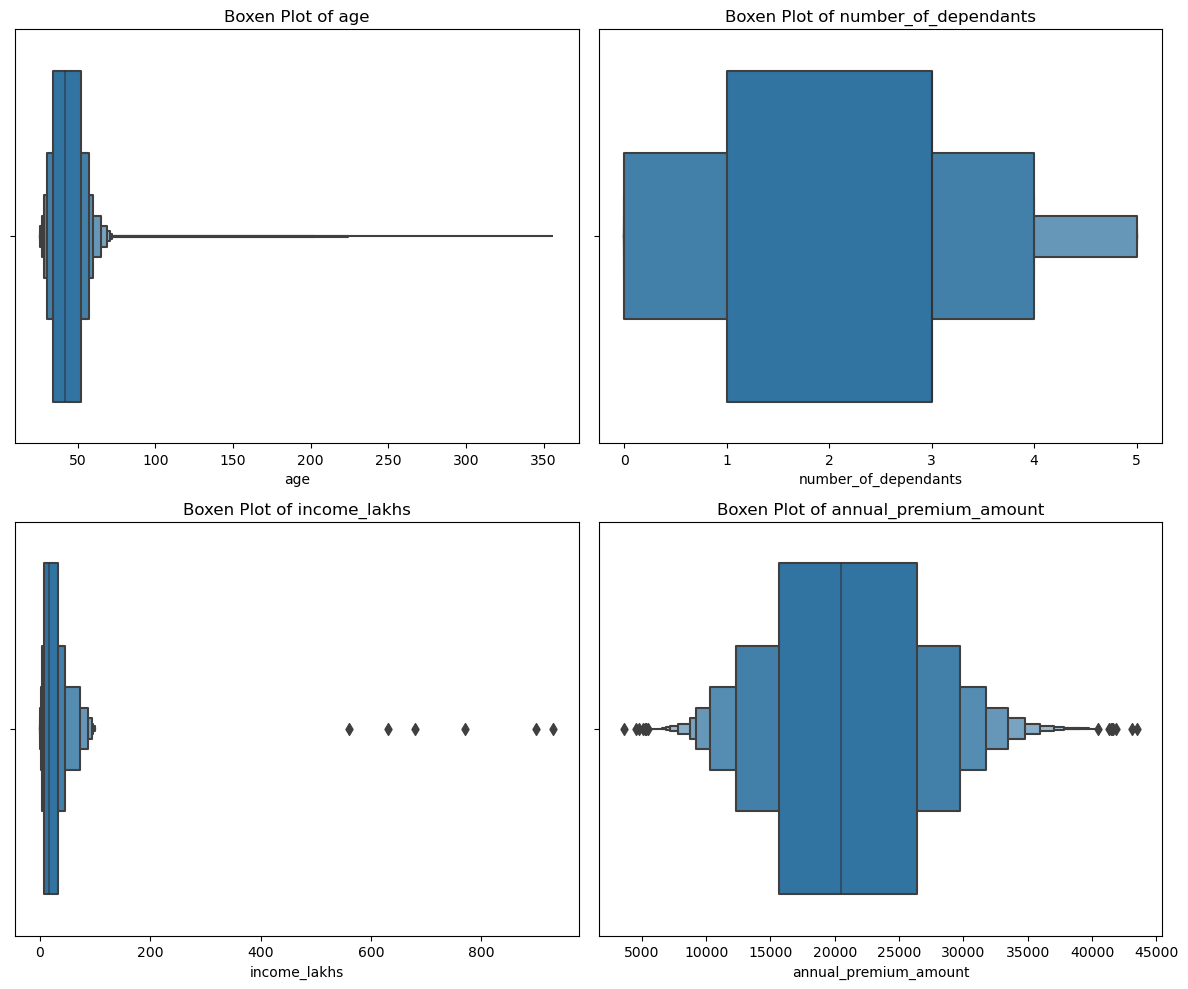

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the size as necessary

# Flatten the axes array for easy indexing (axes is a 2D array)
axes = axes.flatten()

# Loop through the numeric columns and plot each boxen plot on the corresponding subplot
for i, col in enumerate(numeric_columns):
    sns.boxenplot(x=df[col], ax=axes[i])  # Plot on the correct subplot axis
    axes[i].set_title(f'Boxen Plot of {col}')  # Set the title for each subplot

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show all plots at once
plt.show()

In [103]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [104]:
df1=df[df.age<=100]
df1.age.describe()

count    29828.000000
mean        43.095380
std         11.041991
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max         72.000000
Name: age, dtype: float64

In [105]:
def get_iqr_bounds(col):
    Q1, Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound, upper_bound
lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-30.5, 69.5)

In [106]:
df1[df1.income_lakhs>upper].shape

(2090, 13)

In [107]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [108]:
df1[df1.income_lakhs>quantile_thresold].shape

(6, 13)

In [109]:
df2 = df1[df1.income_lakhs<quantile_thresold].copy()
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076


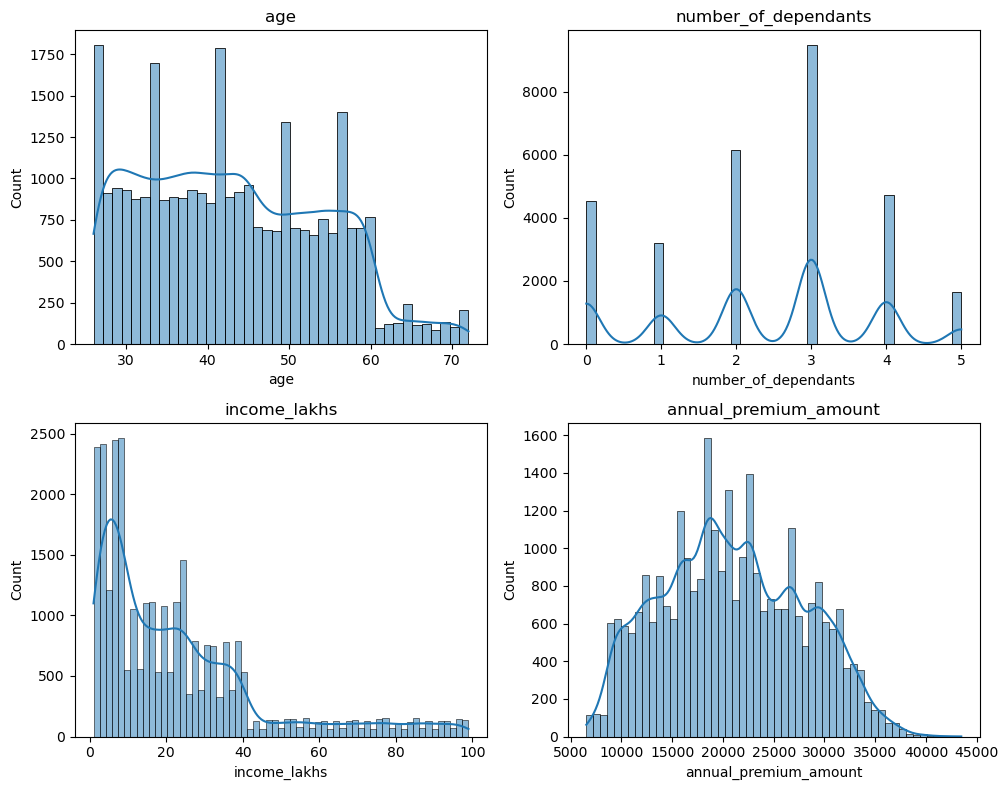

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

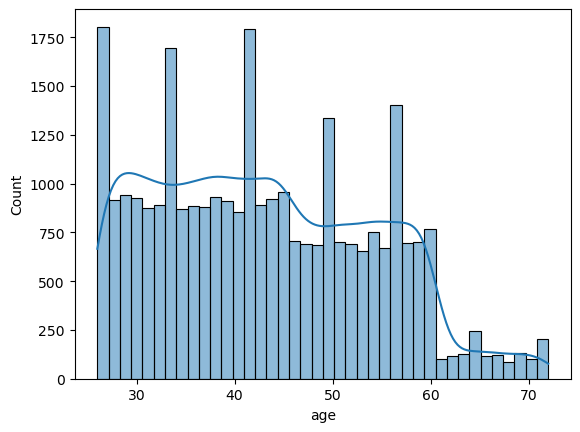

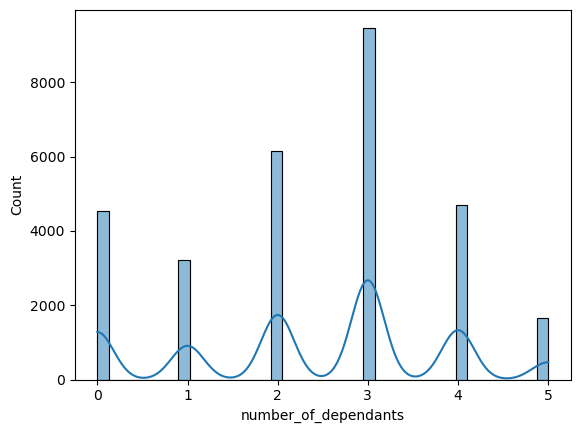

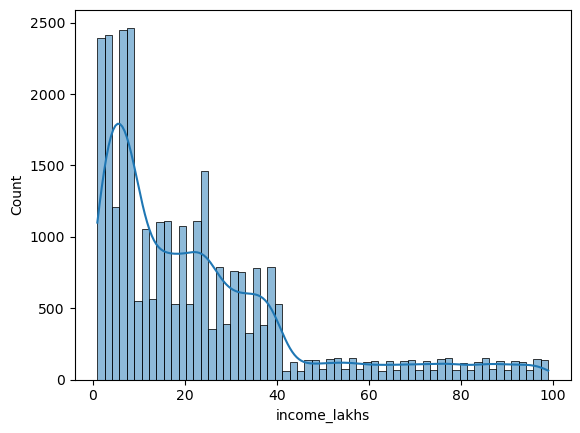

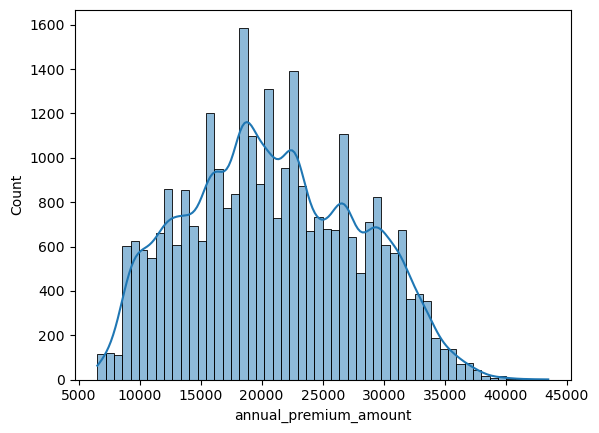

In [111]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

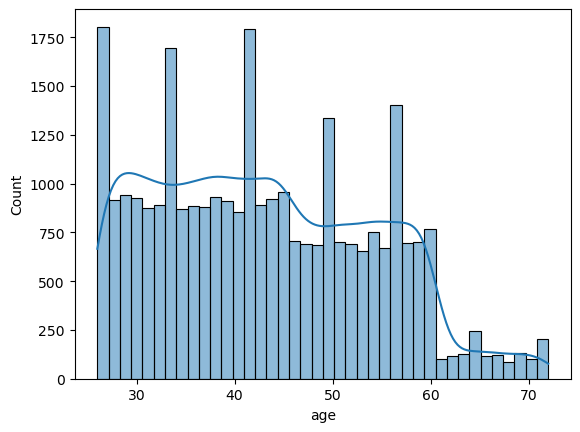

In [112]:
sns.histplot(df2['age'], kde=True)
plt.show()

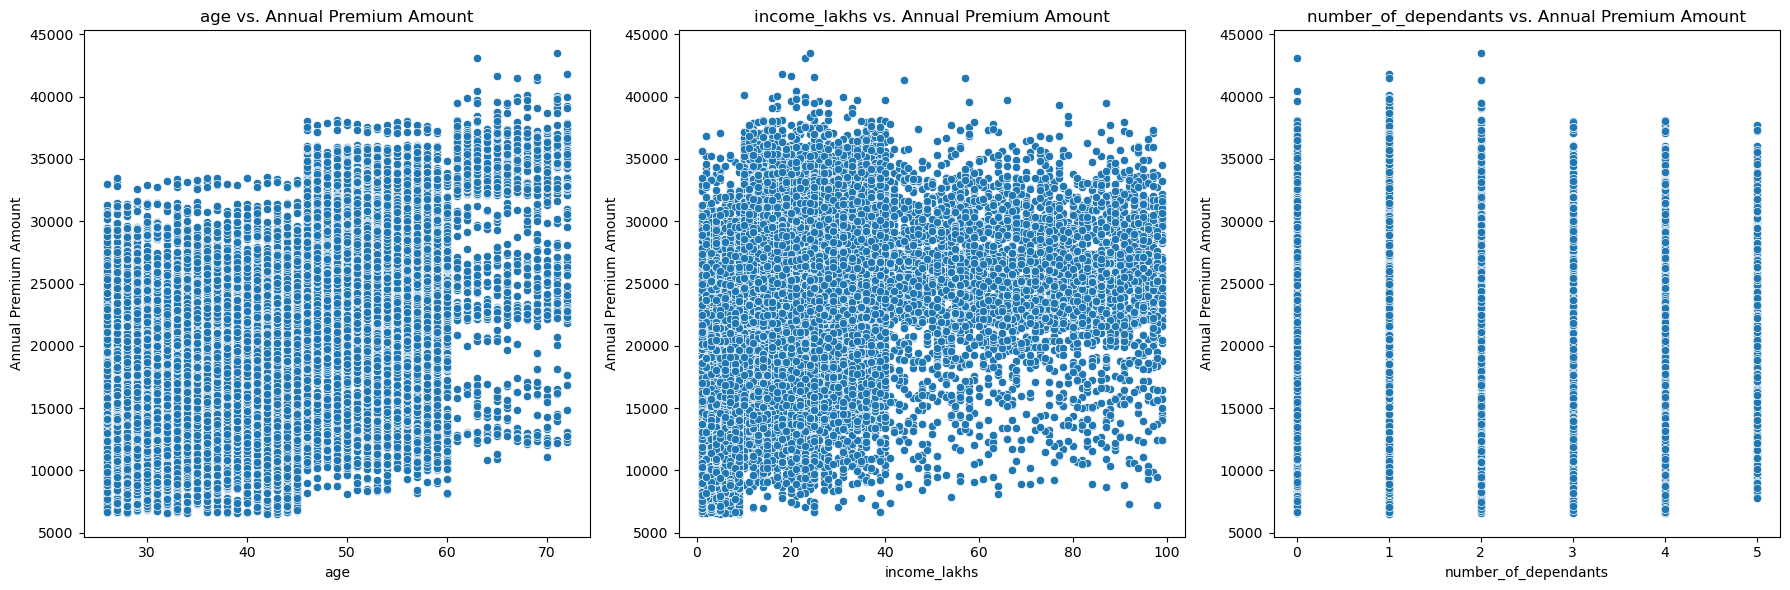

In [113]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

<AxesSubplot:xlabel='age', ylabel='annual_premium_amount'>

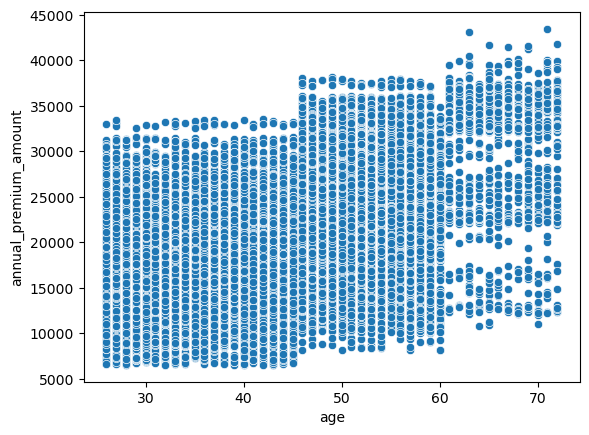

In [114]:
sns.scatterplot(data=df2, x='age', y='annual_premium_amount')

<AxesSubplot:xlabel='age', ylabel='income_lakhs'>

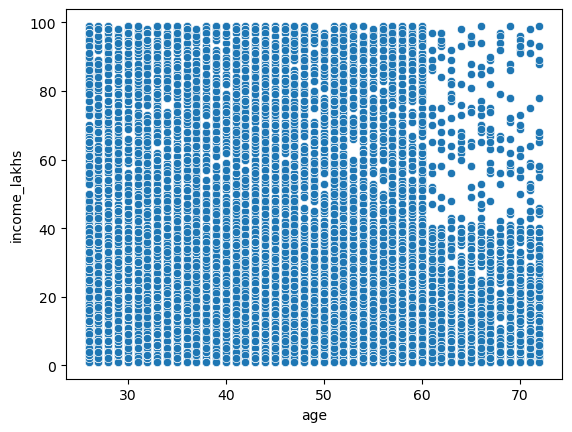

In [115]:
sns.scatterplot(data=df2, x='age', y='income_lakhs')

In [116]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [117]:
categorical_cols= ['gender','region','marital_status','bmi_category','smoking_status','employment_status','medical_history','medical_history','insurance_plan']
for col in categorical_cols:
    print(col, ':', df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [118]:
df2['smoking_status'].replace({'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking',
                              'Not Smoking':'No Smoking'},
                               inplace=True)
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [119]:
pct_count=df2['gender'].value_counts(normalize=True)
pct_count

Male      0.548968
Female    0.451032
Name: gender, dtype: float64

In [120]:
pct_count.values

array([0.548968, 0.451032])

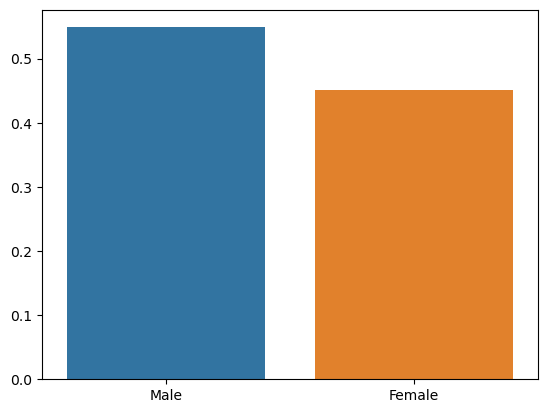

In [121]:
sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

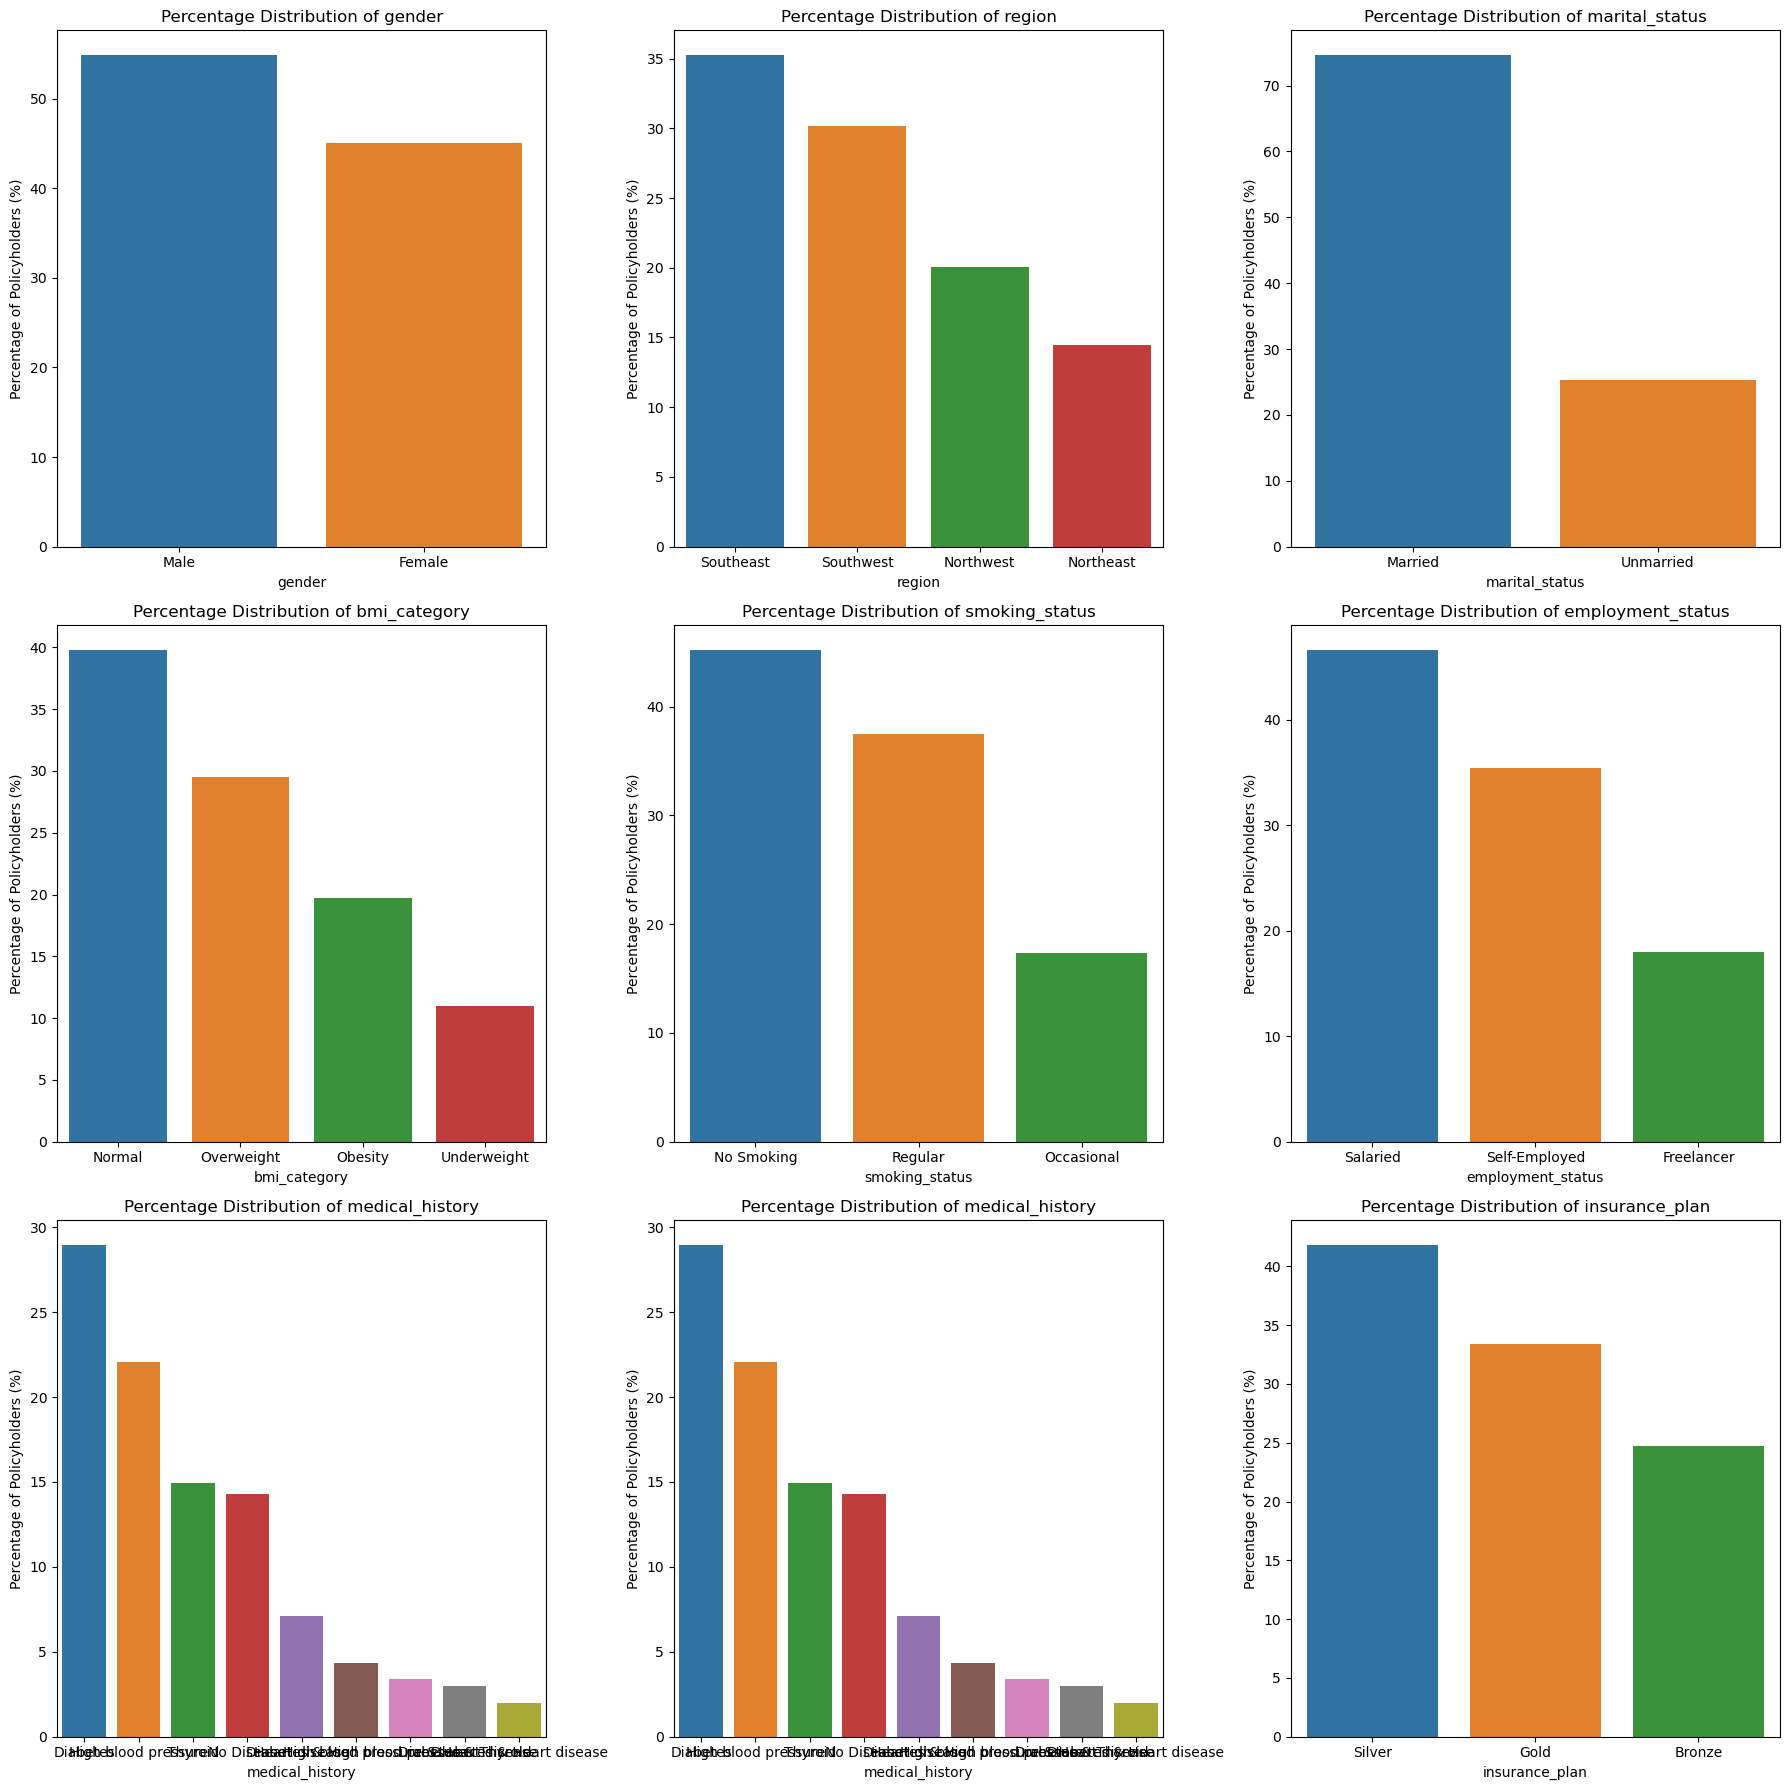

In [122]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [123]:
cross_tab=pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,211,3231,609


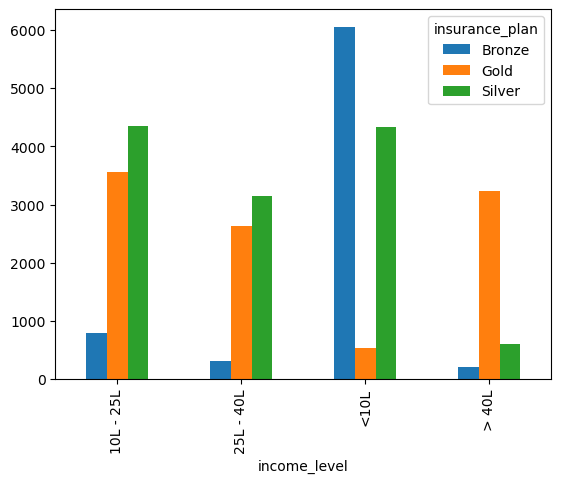

In [124]:
cross_tab.plot(kind="bar")
plt.show()

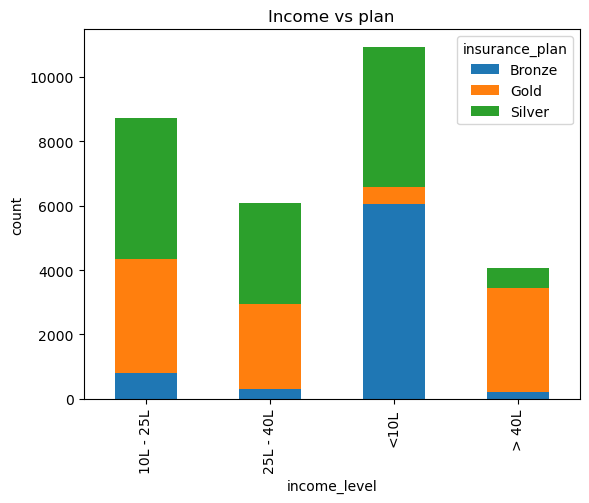

In [125]:
cross_tab.plot(kind="bar",stacked=True)
plt.title('Income vs plan')
plt.ylabel('count')
plt.show()

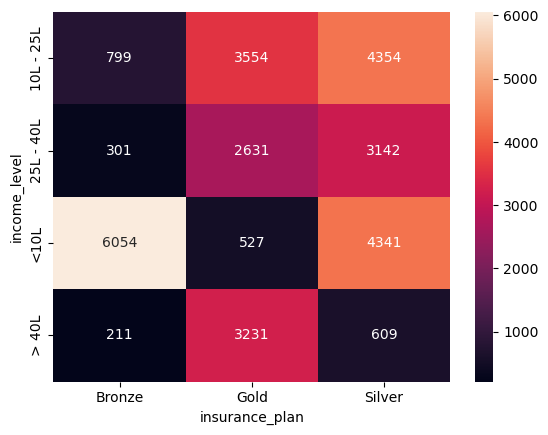

In [126]:
sns.heatmap(cross_tab, annot=True,fmt='d')
plt.show()


In [127]:
 df.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [128]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [129]:
risk_scores = {  "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0}


In [130]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [131]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [132]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [133]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [134]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,diabetes,none,6,0.428571


In [135]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1


In [136]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29754 entries, 0 to 29903
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              29754 non-null  int64  
 1   number_of_dependants             29754 non-null  int64  
 2   income_level                     29754 non-null  int64  
 3   income_lakhs                     29754 non-null  int64  
 4   medical_history                  29754 non-null  object 
 5   insurance_plan                   29754 non-null  int64  
 6   annual_premium_amount            29754 non-null  int64  
 7   disease1                         29754 non-null  object 
 8   disease2                         29754 non-null  object 
 9   total_risk_score                 29754 non-null  int64  
 10  normalized_risk_score            29754 non-null  float64
 11  gender_Male                      29754 non-null  int32  
 12  region_Northwest  

In [137]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)  

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


In [138]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

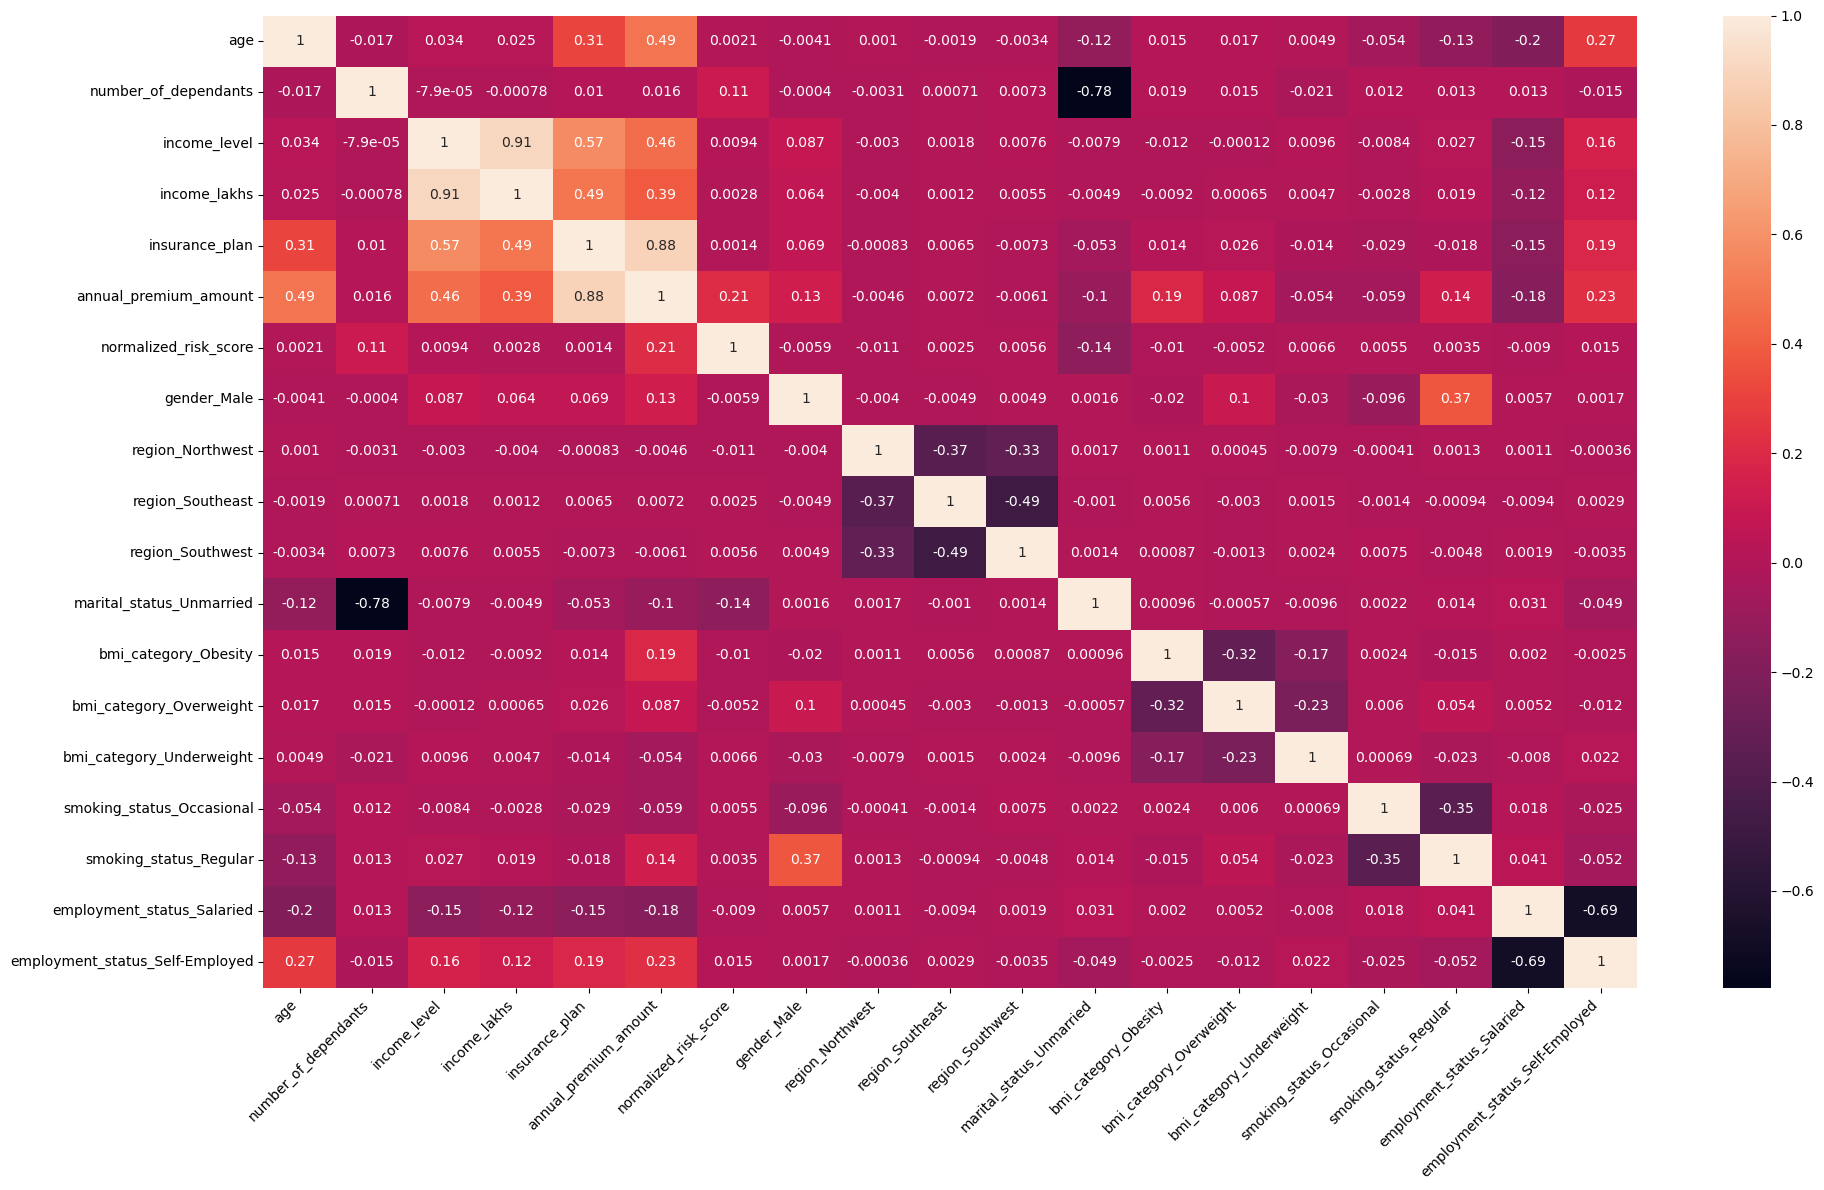

In [139]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [140]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [141]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000
mean,0.371683,0.477536,0.369788,0.225009,0.543322,0.426404,0.548968,0.200746,0.352726,0.301875,0.253378,0.196982,0.294918,0.110103,0.173254,0.374605,0.466189,0.354272
std,0.240080,0.284145,0.350221,0.226314,0.378885,0.240132,0.497605,0.400565,0.477826,0.459079,0.434953,0.397725,0.456014,0.313023,0.378473,0.484029,0.498864,0.478300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.061224,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.163265,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.316327,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [144]:
calculate_vif(X)

,Column,VIF
0,age,3.924740
1,number_of_dependants,6.276728
2,income_level,14.063416
3,income_lakhs,11.408527
4,insurance_plan,5.260860
5,normalized_risk_score,3.809601
6,gender_Male,2.598259
7,region_Northwest,2.123193
8,region_Southeast,2.979784
9,region_Southwest,2.708419


In [145]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Column,VIF
0,age,3.865086
1,number_of_dependants,6.276116
2,income_lakhs,2.690925
3,insurance_plan,4.571804
4,normalized_risk_score,3.807473
5,gender_Male,2.590560
6,region_Northwest,2.122529
7,region_Southeast,2.978859
8,region_Southwest,2.706927
9,marital_status_Unmarried,2.345161


In [146]:
X_reduced=X.drop('income_level', axis='columns')
X_reduced

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.051020,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.051020,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.193878,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.775510,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.132653,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,0.739130,0.6,0.255102,1.0,0.428571,0,1,0,0,0,0,0,0,0,0,0,1
29900,0.304348,0.0,0.153061,1.0,0.785714,0,0,1,0,1,0,1,0,0,1,1,0
29901,0.239130,0.0,0.030612,0.0,0.000000,0,1,0,0,1,1,0,0,0,0,1,0
29902,0.456522,0.4,0.826531,1.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (20827, 17)
x test:  (8927, 17)
y train:  (20827,)
y test:  (8927,)


In [148]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.9537747062669479, 0.9529823324689619)

In [149]:
model_lr.coef_

array([ 6963.534532, -1312.792163,  -752.016885, 14857.742785,
        6025.25138 ,    52.910947,   -41.935549,    -4.287785,
          -5.589707,  -720.469122,  3958.235979,  2016.943331,
         605.139302,   829.3937  ,  2801.003376,   -81.775155,
         246.364123])

In [150]:
model_lr.intercept_

5934.16482285313

In [151]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  2265696.832782326 RMSE:  1505.223183711414


In [152]:
X_test.shape

(8927, 17)

In [153]:
y_test.shape

(8927,)

In [154]:
X_train.shape

(20827, 17)

In [155]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([ 6963.534532, -1312.792163,  -752.016885, 14857.742785,
        6025.25138 ,    52.910947,   -41.935549,    -4.287785,
          -5.589707,  -720.469122,  3958.235979,  2016.943331,
         605.139302,   829.3937  ,  2801.003376,   -81.775155,
         246.364123])

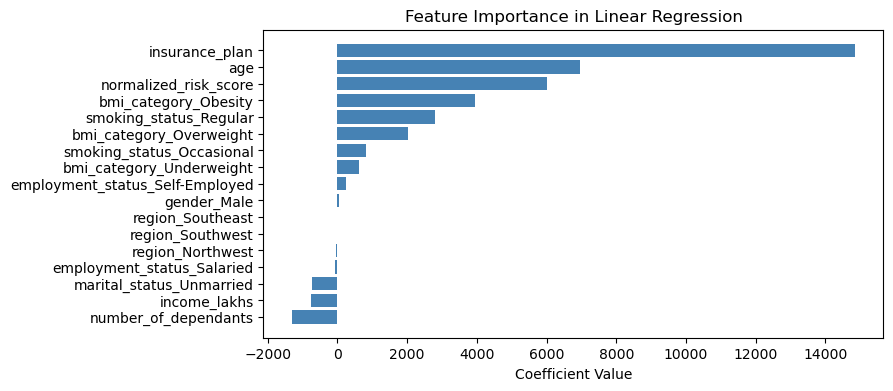

In [156]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [157]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9537745356368772, 0.9529834791901383)

In [158]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score = model_xgb.score(X_train, y_train)
train_score, test_score

(0.9986194924331387, 0.9980076689036367)

In [159]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBOOST Regression ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBOOST Regression ==> MSE:  96006.85214561675 RMSE:  309.84972510172855


In [160]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.997016202191146

In [161]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [162]:
best_model = random_search.best_estimator_

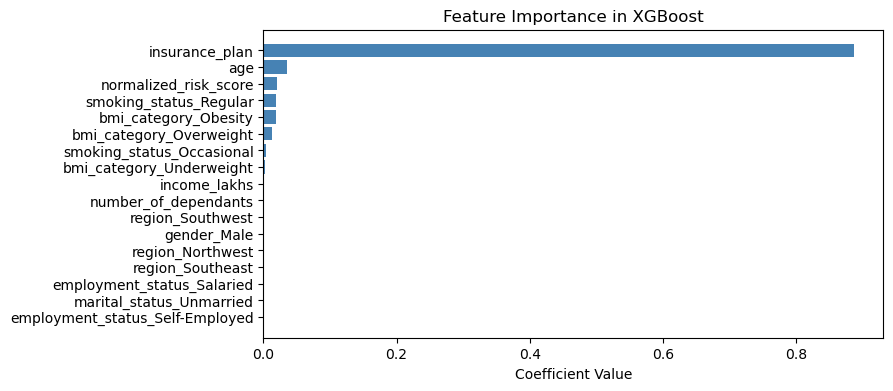

In [163]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### error analysis

In [164]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
18272,12370,12079.240234,-290.759766,-2.350524
24662,11253,11753.384766,500.384766,4.446679
1789,30688,30553.044922,-134.955078,-0.439765
29834,22139,22513.017578,374.017578,1.689406
1478,27040,27357.199219,317.199219,1.173074


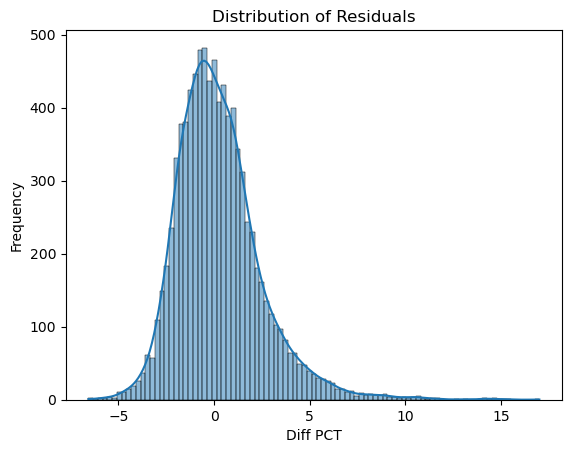

In [165]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [166]:
results_df[np.abs(results_df.diff_pct)>10]

,actual,predicted,diff,diff_pct
6163,6847,7649.378418,802.378418,11.718686
14728,6788,7649.378418,861.378418,12.689723
1549,8543,9413.350586,870.350586,10.187880
9756,6929,7649.378418,720.378418,10.396571
29165,8547,9413.350586,866.350586,10.136312
13744,6691,7649.378418,958.378418,14.323396
3979,6711,7649.378418,938.378418,13.982691
13973,10583,11753.384766,1170.384766,11.059102
22941,6934,7649.378418,715.378418,10.316966
7547,6538,7649.378418,1111.378418,16.998752


In [167]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
6163,6847,7649.378418,802.378418,11.718686
14728,6788,7649.378418,861.378418,12.689723
1549,8543,9413.350586,870.350586,10.187880
9756,6929,7649.378418,720.378418,10.396571
29165,8547,9413.350586,866.350586,10.136312


In [168]:
extreme_results_df.shape

(32, 4)

In [169]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

0.35846308950375266

In [170]:
results_df[np.abs(results_df.diff_pct)>50]

,actual,predicted,diff,diff_pct


In [171]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct


In [172]:
extreme_results_df.index

Int64Index([ 6163, 14728,  1549,  9756, 29165, 13744,  3979, 13973, 22941,
             7547, 13903,   252,  9285, 24145, 29258, 15581,  8506,  4557,
            25617, 15413,  6661,  8176,  7028, 10741, 29657,  1648,  9150,
             8835, 11231, 23883,  2582, 14521],
           dtype='int64')

In [173]:
X_test.index

Int64Index([18272, 24662,  1789, 29834,  1478, 17822, 25874, 29750,  6163,
             4487,
            ...
            28539,  8610, 21146, 26201, 19137,  8857,  3726,  6030, 25410,
            13716],
           dtype='int64', length=8927)

In [174]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
6163,0.217391,0.0,0.000000,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,0,0
14728,0.413043,0.0,0.061224,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,0,1
1549,0.065217,0.8,0.020408,0.0,0.428571,1,0,1,0,0,0,0,0,0,0,1,0
9756,0.326087,0.4,0.061224,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
29165,0.195652,0.8,0.020408,0.0,0.428571,0,1,0,0,0,0,0,0,0,0,1,0
13744,0.304348,0.2,0.081633,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,0,1
3979,0.347826,0.6,0.051020,0.0,0.000000,1,1,0,0,0,0,0,0,0,0,1,0
13973,0.152174,0.8,0.030612,0.0,0.857143,0,1,0,0,0,0,0,0,0,0,0,1
22941,0.152174,0.0,0.020408,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,1,0
7547,0.347826,0.2,0.081633,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0


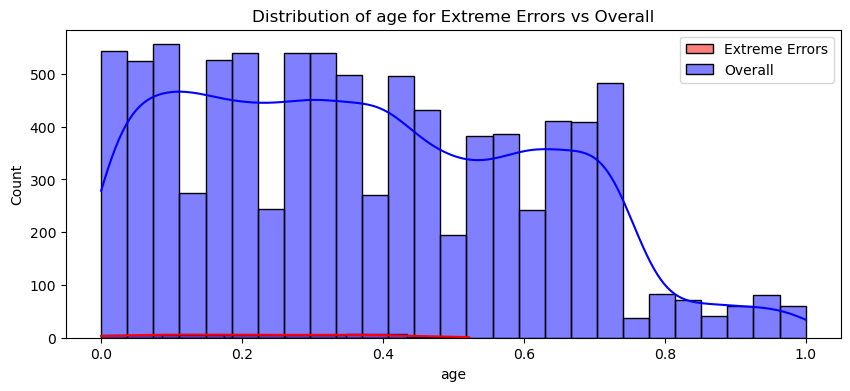

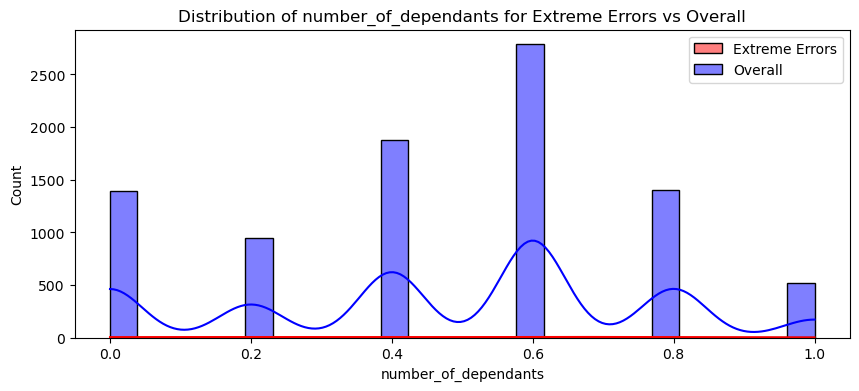

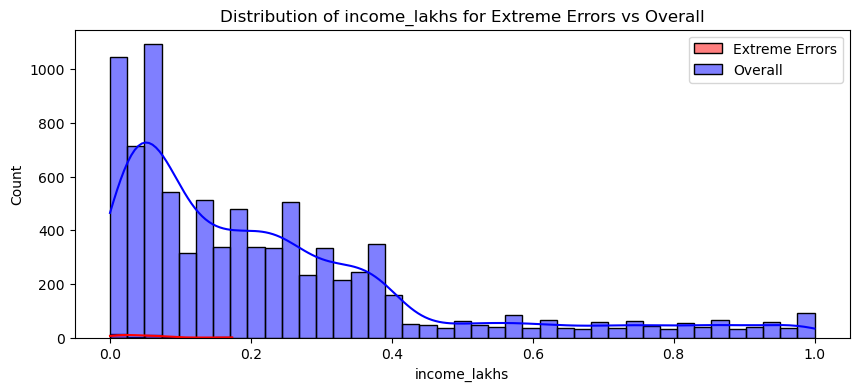

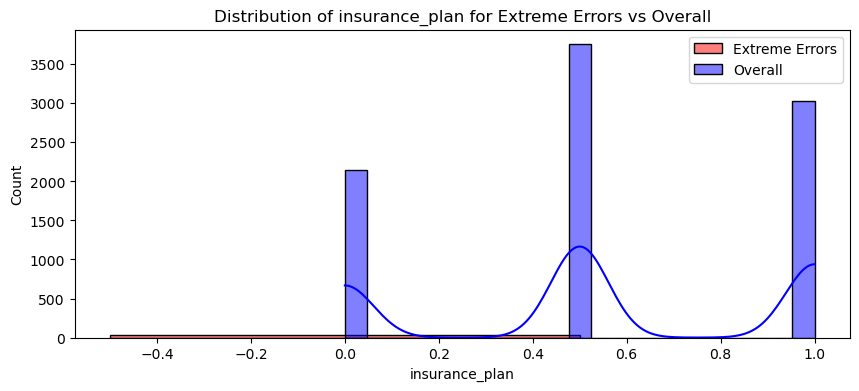

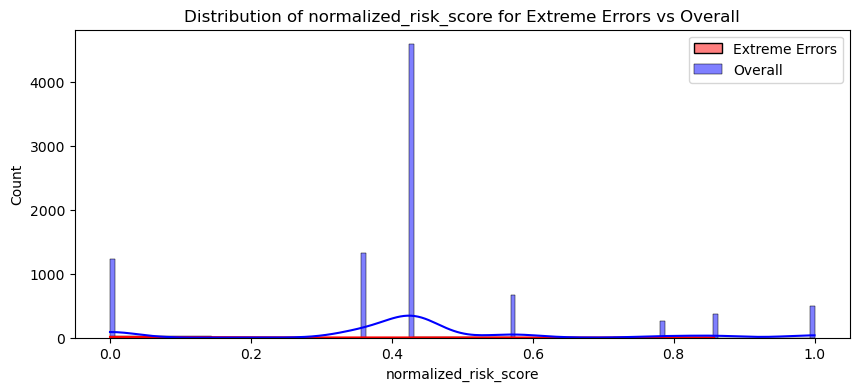

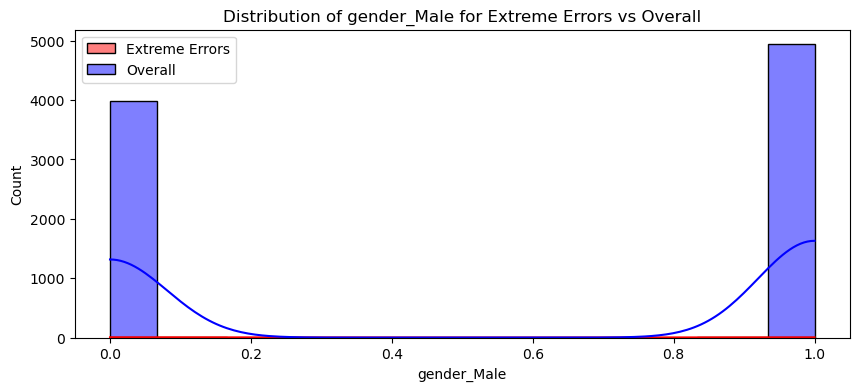

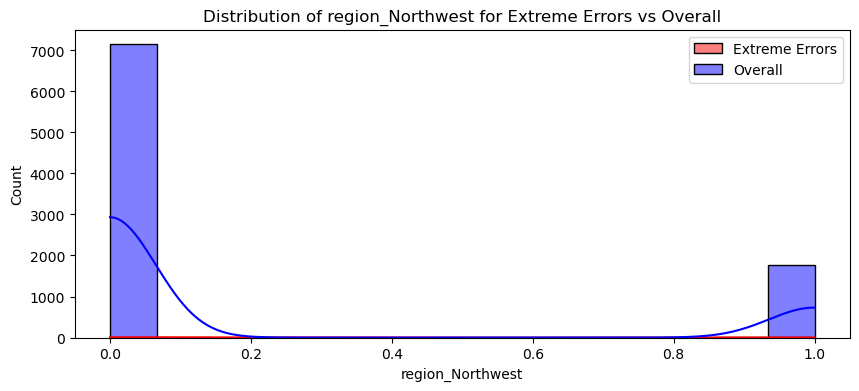

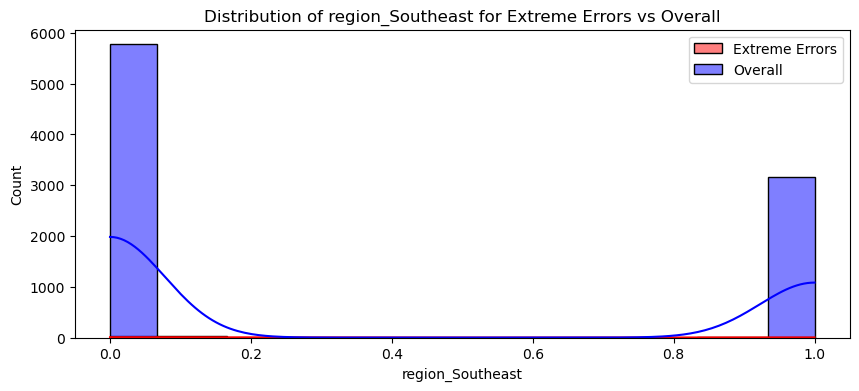

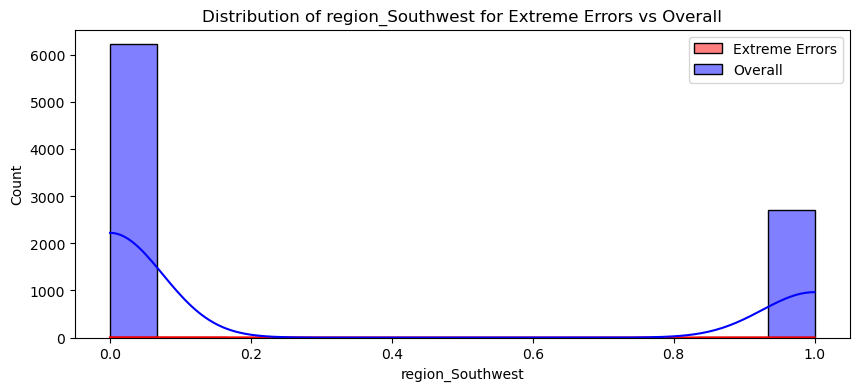

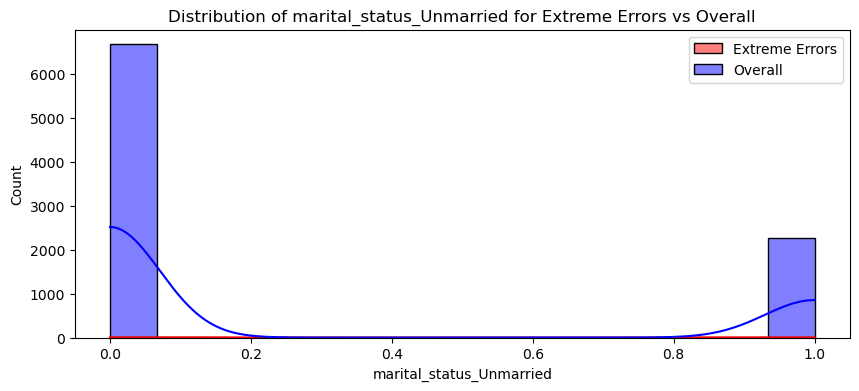

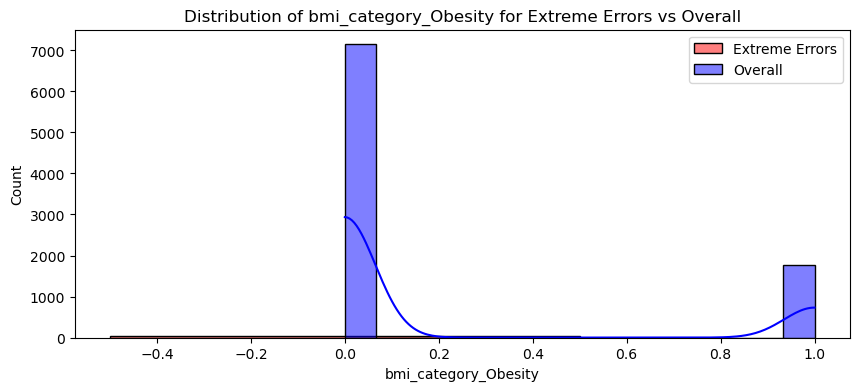

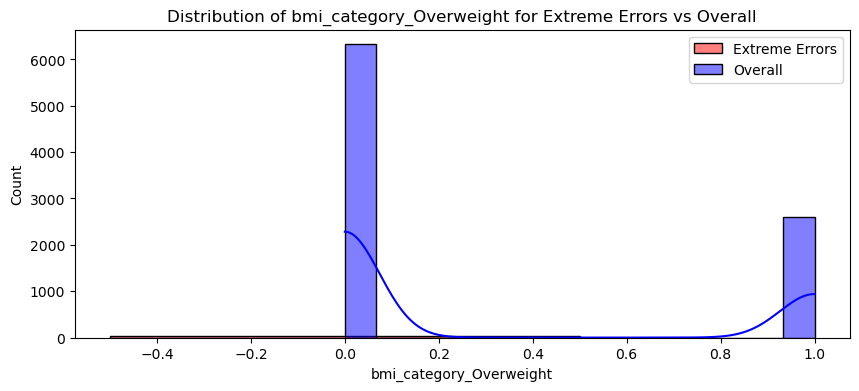

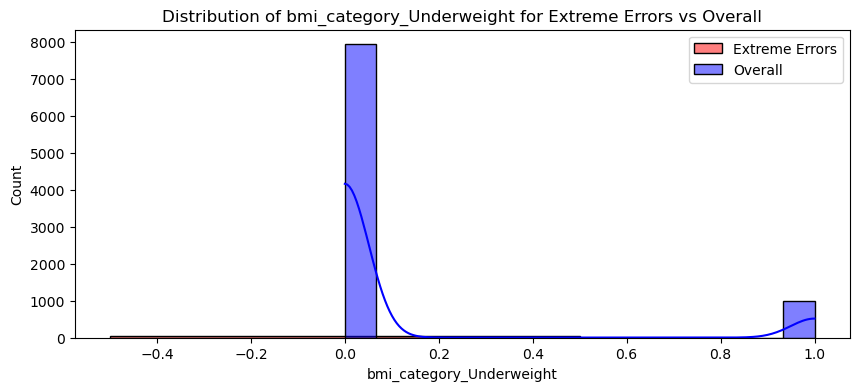

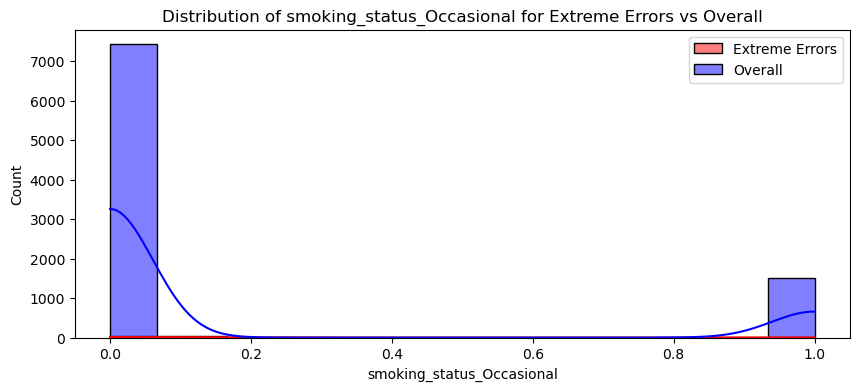

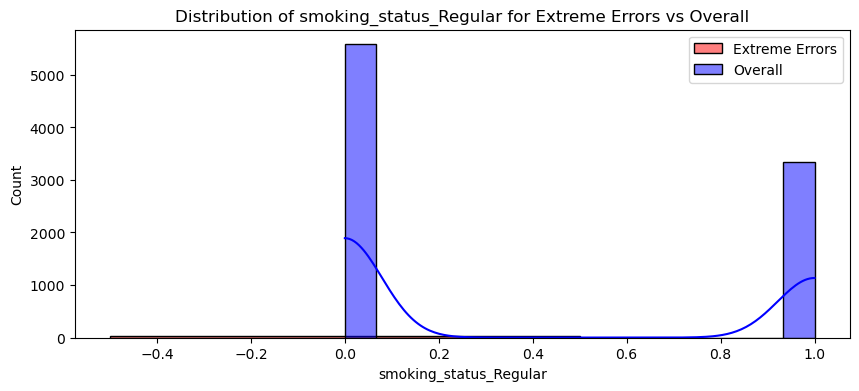

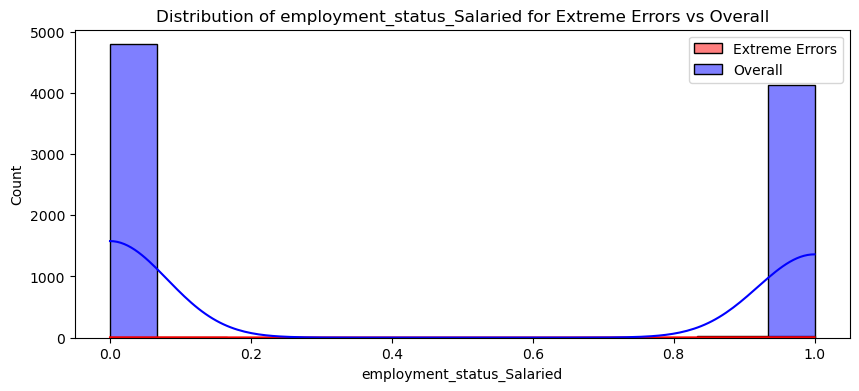

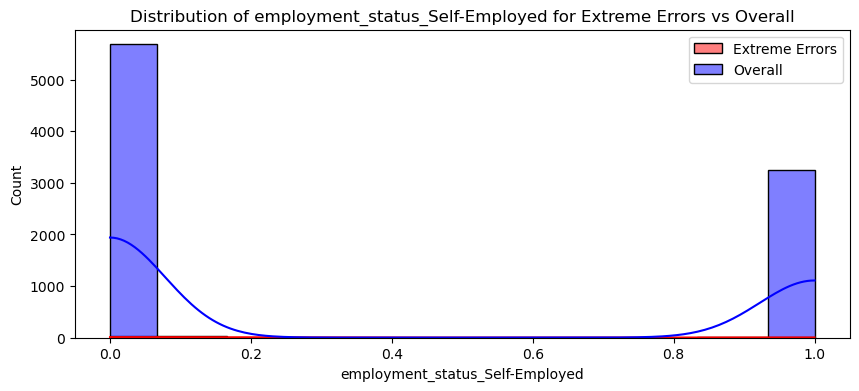

In [175]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [176]:
extreme_errors_df['income_level']=-1

In [177]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,36.0,0.0,-2.0,1.0,1.0
1,45.0,0.0,-2.0,7.0,1.0
2,29.0,4.0,-2.0,3.0,1.0
3,41.0,2.0,-2.0,7.0,1.0
4,35.0,4.0,-2.0,3.0,1.0


In [178]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,32.000000,32.000000,32.0,32.000000,32.0
mean,36.531250,2.125000,-2.0,4.937500,1.0
std,6.554902,1.581139,0.0,3.378657,0.0
min,26.000000,0.000000,-2.0,1.000000,1.0
25%,30.750000,1.000000,-2.0,3.000000,1.0
50%,36.000000,3.000000,-2.0,4.000000,1.0
75%,42.000000,3.000000,-2.0,7.000000,1.0
max,50.000000,5.000000,-2.0,18.000000,1.0


<AxesSubplot:xlabel='age', ylabel='Count'>

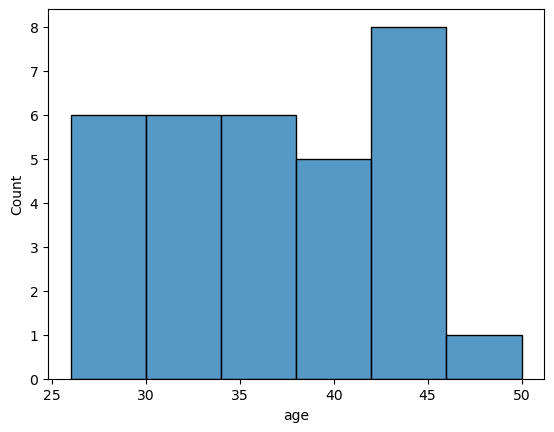

In [179]:
sns.histplot(df_reversed.age)